#                                     Error Analysis

In [20]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu,SmoothingFunction
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')
import pickle
from tqdm.notebook import tqdm
import os 

In [2]:
# dataset import
df = pd.read_csv('last3.csv')
df = df.iloc[:,1:]
df.head()

,frontal,lateral,impression
0,CXR1_1_IM-0001-3001.png,CXR1_1_IM-0001-4001.png,normal chest
1,CXR10_IM-0002-2001.png,CXR10_IM-0002-1001.png,no acute cardiopulmonary process
2,CXR100_IM-0002-1001.png,CXR100_IM-0002-2001.png,no active disease
3,CXR1000_IM-0003-3001.png,CXR1000_IM-0003-1001.png,one increased opacity right upper lobe associa...
4,CXR1000_IM-0003-1001.png,CXR1000_IM-0003-2001.png,one increased opacity right upper lobe associa...


In [3]:
# load pickle file, contain predicted text with bleu score by encoder decoder model
pickle_in  = open( 'prediction1.pickle', "rb")
pred = pickle.load(pickle_in)

In [4]:
# seprate predict textn, bleu score and store in lists
prediction = [ ]
bleu = [ ]

for key, value in tqdm(pred.items()) :
    bleu.append(value[0])
    value = " ".join(value[1])
    prediction.append(value)

  0%|          | 0/4050 [00:00<?, ?it/s]

In [6]:
# add bleu score and prediction columns in datasets
df['prediction'] = prediction
df['bleu'] = bleu

In [144]:
df

,frontal,lateral,impression,prediction,bleu
0,CXR1_1_IM-0001-3001.png,CXR1_1_IM-0001-4001.png,normal chest,large size hemidiaphragms innumerable peripher...,0.417226
1,CXR10_IM-0002-2001.png,CXR10_IM-0002-1001.png,no acute cardiopulmonary process,no acute cardiopulmonary findings,0.707107
2,CXR100_IM-0002-1001.png,CXR100_IM-0002-2001.png,no active disease,one hyperexpanded lungs copd,0.000000
3,CXR1000_IM-0003-3001.png,CXR1000_IM-0003-1001.png,one increased opacity right upper lobe associa...,lateral view left six rib no exacerbation hear...,0.301690
4,CXR1000_IM-0003-1001.png,CXR1000_IM-0003-2001.png,one increased opacity right upper lobe associa...,no evidence pneumonia,0.000000
...,...,...,...,...,...
4045,CXR996_IM-2479-1001.png,CXR996_IM-2479-2001.png,heart size normal lungs clear no pneumothorax ...,no acute cardiopulmonary abnormality,0.202589
4046,CXR997_IM-2479-1001.png,CXR997_IM-2479-2001.png,no acute cardiopulmonary abnormality,clear lungs,0.000000
4047,CXR998_IM-2479-1001.png,CXR998_IM-2479-2001.png,no acute cardiopulmonary abnormality,no acute cardiopulmonary abnormality,1.000000
4048,CXR999_IM-2480-3001.png,CXR999_IM-2480-2001.png,no acute cardiopulmonary abnormality,postoperative lateral mm compatible focal nodu...,0.000000


# Low bleu score contents

### Frontal image with low bleu score

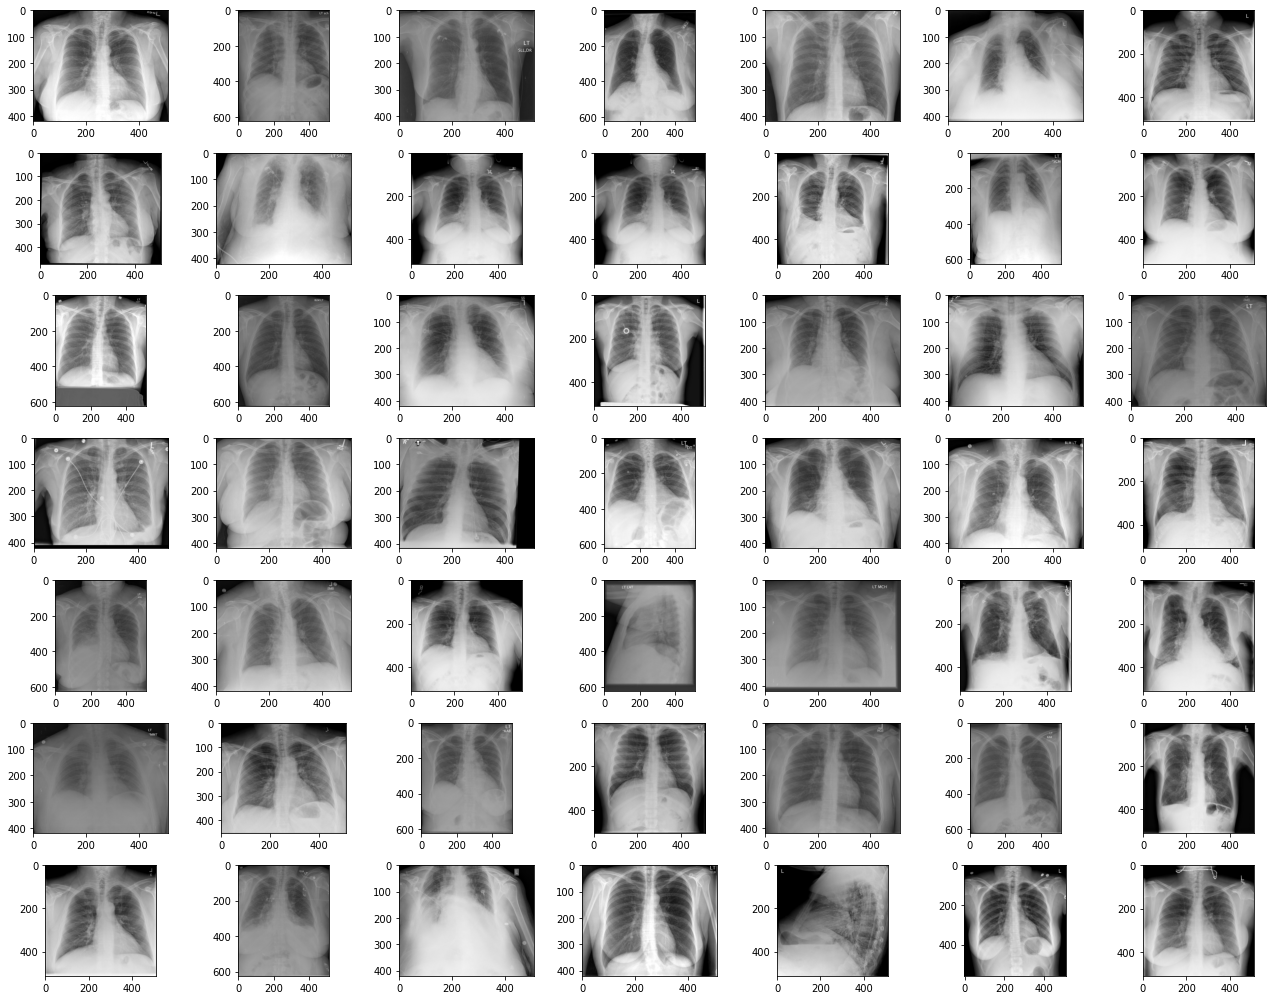

In [48]:
# taken frontal image which have 0.05 below bleu score
frontal = df['frontal'][df['bleu'] <  0.05 ]

# set the path of image
path = 'D:\Assignment DATA\Deep Learning Case Study\png'
os.chdir(path)

fig, ax = plt.subplots(7,7, figsize = (18, 14))
axs = ax.flatten() 

for i,x in zip(axs, frontal[:49]) :
    img = mpimg.imread(x)
    i.imshow(img) 
    
fig.tight_layout()
plt.show()
os.chdir(r'C:\Users\Dell\Python\Python AAIC File\Assignments\CAST STUDY DL')

# Observation :- 

* We observe from above images, some image have low resolution, some images are have different size and some are not propar visulize.


### Lateral image with low bleu score

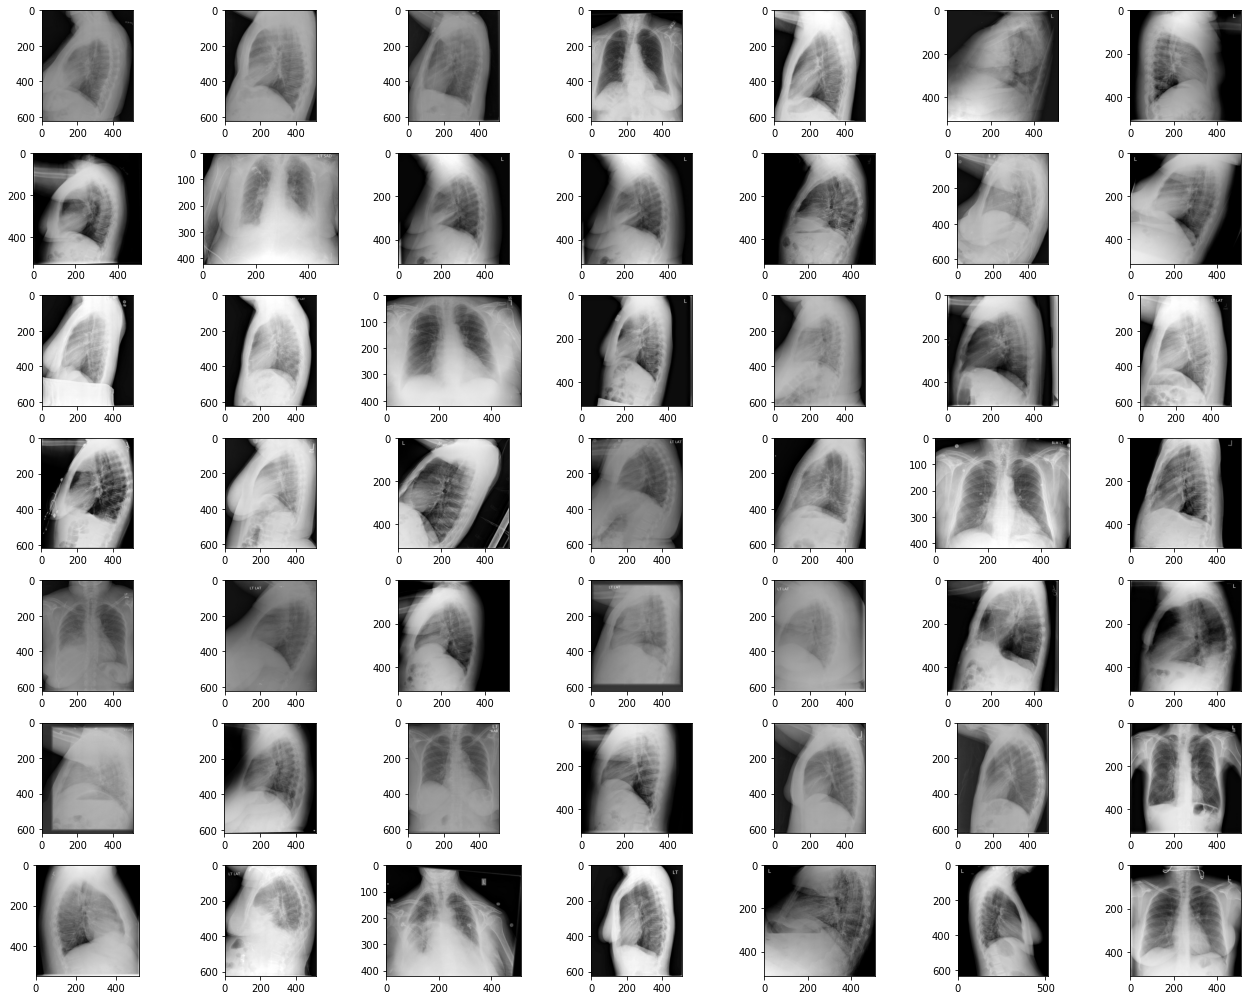

In [50]:
lateral = df['lateral'][df['bleu'] < 0.05 ]

# set the path of image
path = 'D:\Assignment DATA\Deep Learning Case Study\png'
os.chdir(path)

fig, ax = plt.subplots(7,7, figsize = (18, 14))
axs = ax.flatten() 

for i,x in zip(axs, lateral[:49]) :
    img = mpimg.imread(x)
    i.imshow(img) 
    
fig.tight_layout()
plt.show()
os.chdir(r'C:\Users\Dell\Python\Python AAIC File\Assignments\CAST STUDY DL')

# Observation :-

* We see that in above images, higher numbers of images are blur and uneven shape. some images are not in propare lateral shape.

### Acutal report with low bleu score

In [133]:
actual = df['impression'][df['bleu'] < 0.05 ]
split = [ ]
for i in actual :
    split.extend(i.split())

print("Unique words in low bleu score actual text :-", np.unique(split).shape[0])
print(np.unique(split).tolist())

Unique words in low bleu score actual text :- 1197
['abdomen', 'abdominal', 'aberrant', 'abnormal', 'abnormalities', 'abnormality', 'absence', 'accentuated', 'accentuation', 'accepted', 'accompanied', 'acknowledged', 'acromioclavicular', 'active', 'activeacute', 'actual', 'acute', 'addition', 'additional', 'adenopathy', 'adequately', 'adjacent', 'advanced', 'advised', 'aerated', 'aeration', 'age', 'air', 'airspace', 'airwaybronchitic', 'airways', 'alignment', 'allow', 'allowing', 'along', 'already', 'also', 'although', 'alveolar', 'amount', 'andor', 'aneurysm', 'aneurysmal', 'ankle', 'anterior', 'anterolisthesis', 'anticipated', 'aorta', 'aortic', 'apex', 'apical', 'apices', 'apparent', 'apparently', 'appear', 'appearance', 'appearing', 'appears', 'appendage', 'appreciable', 'appreciated', 'approach', 'appropriate', 'approximately', 'approximating', 'area', 'areas', 'arising', 'arterial', 'arteries', 'arteriographic', 'artery', 'artifact', 'artifacts', 'asbestos', 'ascending', 'aspect'

### Predict report with low bleu score

In [132]:
actual = df['prediction'][df['bleu'] < 0.05 ]

split = [ ]

for i in actual :
    split.extend(i.split())
    
print("Unique words in low bleu score prediction text :-",np.unique(split).shape[0])
print(np.unique(split).tolist())

Unique words in low bleu score prediction text :- 876
['abdomen', 'abdominal', 'abnormal', 'abnormalities', 'abnormality', 'absence', 'acknowledged', 'acromioclavicular', 'active', 'acute', 'addended', 'addition', 'additional', 'adenopathy', 'adjacent', 'admission', 'advanced', 'aerated', 'aeration', 'age', 'air', 'airspace', 'airways', 'alignment', 'allow', 'along', 'also', 'although', 'alveolar', 'amount', 'andor', 'ankle', 'anterior', 'anterolisthesis', 'aorta', 'aortic', 'apex', 'apical', 'apparently', 'appear', 'appearance', 'appearing', 'appears', 'appreciable', 'appropriate', 'approximately', 'approximating', 'area', 'areas', 'arrange', 'arteries', 'arteriespulmonary', 'arteriographic', 'arteriosum', 'artery', 'arthritis', 'artifact', 'artifactual', 'ascending', 'aspect', 'aspiration', 'assess', 'assist', 'associated', 'asymmetric', 'atelectasis', 'atelectasisairspace', 'atelectasisinfiltrate', 'atelectasisscar', 'atherosclerotic', 'atrial', 'atrium', 'attributable', 'attributed

# Observation :-

* We found that total 1197 words are unique in our actual impression report which have low bleu score. 


* We can conclude that unique words are rare in the image report, so those words are less important for the prediction.


* In the prediction report corpus total 873 words are unique as compare to high bleu score prediction report.

### Check words in pre train model

In [150]:
# pre trained glove vector 
model = dict()
f = open('/glove_data/glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    model[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(model))

Loaded 400000 word vectors.


In [112]:
# get total image report unique words

corpus = df.impression.tolist()

split = [ ]
for i in corpus :
    split.extend(i.split())
    
split = np.unique(split)

In [114]:
# check how many words are absent in pre trained glove model
absent = 0
for i in tqdm(split):
    try :
        if model[i] :
            absent += 0        
    except :
        absent += 1

print(f'Total 12.12% Words absent in pre-train glove model')
print(f'Total {absent} out of 1432 words absent in pre-train model')

  0%|          | 0/1432 [00:00<?, ?it/s]

Total 12.12% Words absent in pre-train glove model
Total 174 out of 1432 words absent in pre-train model


# Observation :-

* We found that total 12.12% of the words are absent in glove vector, total  174 words are absent in glove vector.

# High bleu score contents

### Frontal image with high bleu score

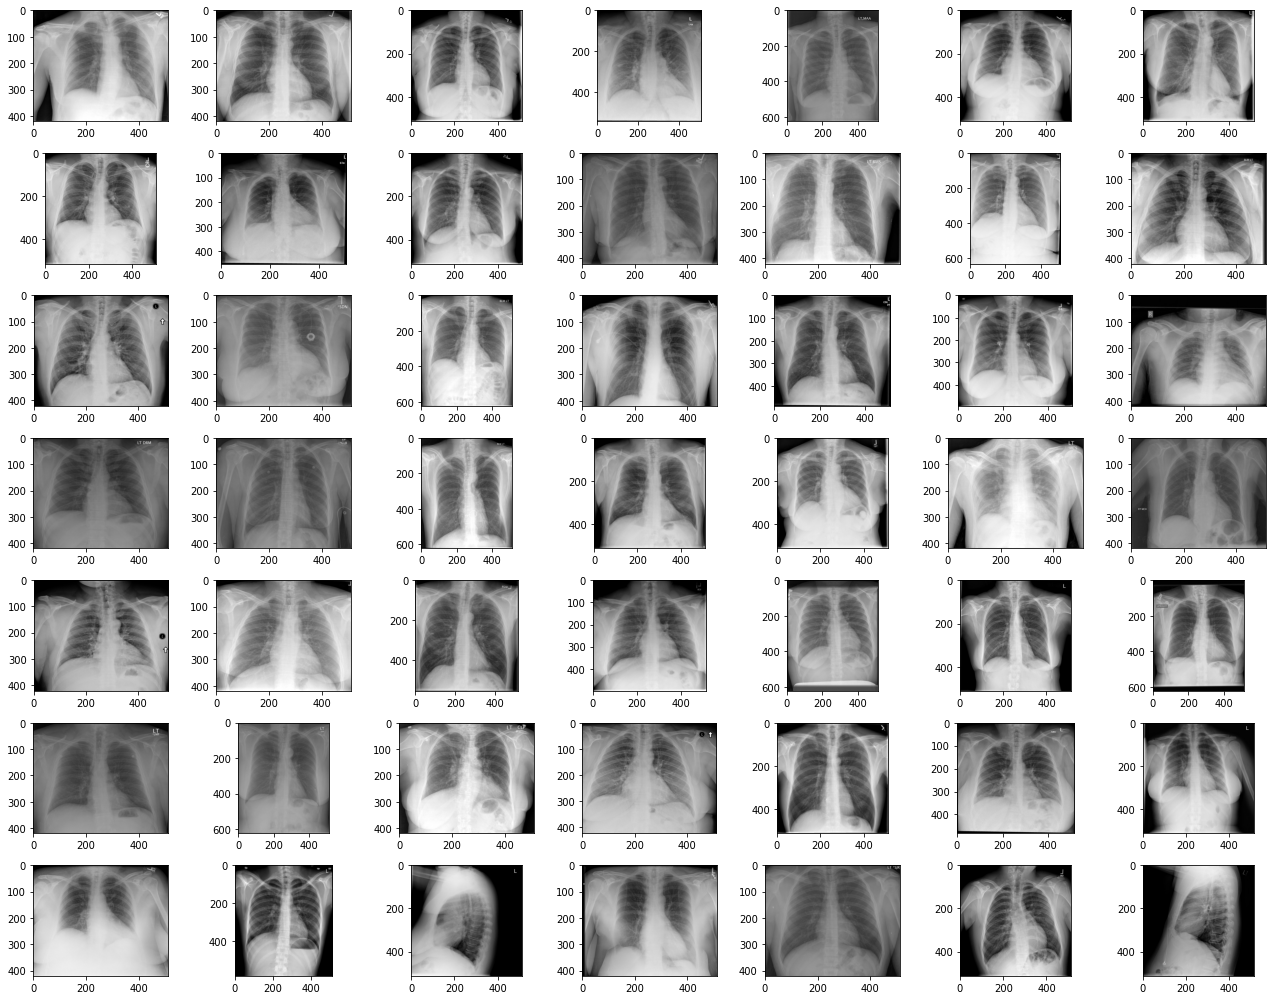

In [147]:
frontal = df['frontal'][df['bleu'] > 0.7 ]

# set the path of image
path = 'D:\Assignment DATA\Deep Learning Case Study\png'
os.chdir(path)

fig, ax = plt.subplots(7,7, figsize = (18, 14))
axs = ax.flatten() 

for i,x in zip(axs, frontal[:49]) :
    img = mpimg.imread(x)
    i.imshow(img) 
    
fig.tight_layout()
plt.show()
os.chdir(r'C:\Users\Dell\Python\Python AAIC File\Assignments\CAST STUDY DL')

# Observation :-

* We found in above less number of images are blue, as compare to the low bleu score images.


* Images are more propar in shape and size.

### Lateral image with high bleu score

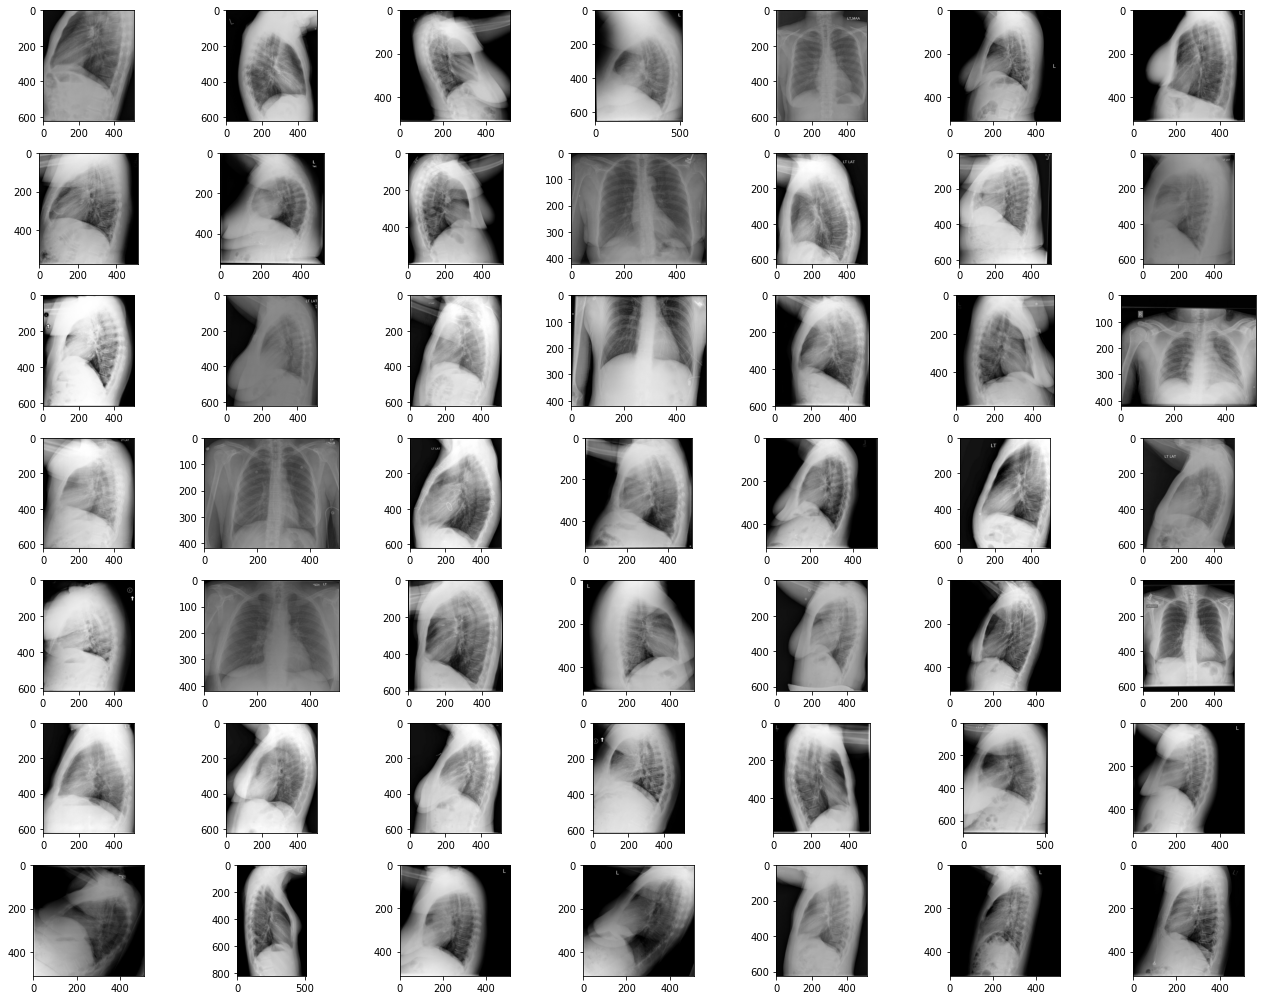

In [148]:
lateral = df['lateral'][df['bleu'] > 0.7 ]

# set the path of image
path = 'D:\Assignment DATA\Deep Learning Case Study\png'
os.chdir(path)

fig, ax = plt.subplots(7,7, figsize = (18, 14))
axs = ax.flatten() 

for i,x in zip(axs, lateral[:49]) :
    img = mpimg.imread(x)
    i.imshow(img) 
    
fig.tight_layout()
plt.show()
os.chdir(r'C:\Users\Dell\Python\Python AAIC File\Assignments\CAST STUDY DL')

# Observation :-

* Image more clear and less blur as compare to low bleu score images. 


* Lateral images in propar shape, clearly visulize.

### Acutal report with high bleu score 

In [134]:
actual = df['impression'][df['bleu'] > 0.7 ]
split = [ ]

for i in actual :
    split.extend(i.split())

print("Unique words in low bleu score actual text :-", np.unique(split).shape[0])
print(np.unique(split).tolist())

Unique words in low bleu score actual text :- 77
['abdomen', 'abnormalities', 'abnormality', 'active', 'activeacute', 'acute', 'airspace', 'borderline', 'cardiac', 'cardiomegaly', 'cardiopulmonary', 'cardiothoracic', 'change', 'changes', 'chest', 'chronic', 'clear', 'consistent', 'consolidation', 'contour', 'copd', 'demonstrated', 'disease', 'effusion', 'emphysema', 'enlarged', 'evidence', 'failure', 'finding', 'findings', 'focal', 'heart', 'hyperexpanded', 'hypoinflation', 'identified', 'impression', 'injury', 'interval', 'intrathoracic', 'left', 'lobar', 'lung', 'lungs', 'marked', 'mechanical', 'mediastinal', 'moderate', 'negative', 'no', 'normal', 'obstruction', 'one', 'pleural', 'pneumonia', 'pneumothorax', 'postradiation', 'postsurgical', 'preoperative', 'present', 'process', 'pulmonary', 'radiographic', 'sarcoidosis', 'scoliosis', 'seen', 'significant', 'silhouette', 'size', 'stable', 'thoracic', 'thoracolumbar', 'tuberculosis', 'two', 'unremarkable', 'visible', 'visualized', 'wi

### Predict report with high bleu score

In [136]:
actual = df['prediction'][df['bleu'] > 0.7 ]
split = [ ]

for i in actual :
    split.extend(i.split())

print("Unique words in low bleu score prediction text :-", np.unique(split).shape[0])
print(np.unique(split).tolist())

Unique words in low bleu score prediction text :- 112
['abdominal', 'abnormalities', 'abnormality', 'active', 'acute', 'age', 'airspace', 'anterior', 'anticipated', 'appear', 'appearance', 'atelectasis', 'bibasilar', 'bony', 'cardiac', 'cardiomegaly', 'cardiopulmonary', 'changes', 'chest', 'chronic', 'circumscribed', 'clear', 'comparison', 'contour', 'copd', 'could', 'disease', 'dislocations', 'edema', 'effusions', 'elevation', 'emphysema', 'emphysematous', 'evidence', 'exam', 'examination', 'expanded', 'failure', 'feasible', 'finding', 'findings', 'focal', 'granulomatous', 'history', 'hyperexpanded', 'hyperexpansion', 'hyperinflated', 'hypoinflation', 'identified', 'ill', 'increased', 'infiltrate', 'interstitial', 'intrathoracic', 'lateral', 'left', 'lingula', 'lingular', 'low', 'lung', 'lungs', 'marked', 'mediastinal', 'mild', 'moderate', 'multiple', 'negative', 'no', 'normal', 'one', 'osseous', 'otherwise', 'please', 'pneumonia', 'pneumothorax', 'possibility', 'postsurgical', 'postt

# Observation :-

* Predict text corpus and actual text corpus have less number of unique words as compare to low bleu score corupus have.

# Conclusion :-



### Best prediction :-

* We conclude that, have clear images of frontal and lateral view.
* Less number unique words.
* get similar words of absent words in pretrain glove or w2v model, use fasttext model.

### Wrost Prediction :-

* Unclear images, uneven brightness.
* Less number of unique words and more number of repeated words.
* Absent words in pretrain models.
* Uneven shape of images, improper view.